# Laboratory work  4

**Выделение контуров на изображениях.**

Completed: гр.№ 6131-010402D, Griaznov Ilia <br/>
Variant № 8

In [1]:
from itertools import product
from warnings import filterwarnings
from skimage import img_as_float, img_as_ubyte
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from matplotlib.pyplot import *
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import copy
import math

filterwarnings("ignore")
%matplotlib inline

Для свертки использовать написанную ранее в ЛР2 функцию, по необходимость дописать её для работы с масками с четной размерностью.

1. Считать цветное rgb изображение. Преобразовать в градации серого.

2. Сделать выделение контуров методом простого градиента. В качестве значения модуля градиента использовать указанный в вариантах метод. 
  *   Вход: изображение из пункта 1
  *   Вывод: бинарное изображение с контурами
3. Сделать выделение контуров методом по вариантам.  
  *   Вход: изображение из пункта 1
  *   Вывод: бинарное изображение с контурами

4. Сделать выделение контуров методом с согласованием. Тип функции аппроксимации и размер окна указан по вариантам. 
  *   Вход: изображение из пункта 1
  *   Вывод: бинарное изображение с контурами

    
*Для работы с изображением использовать OpenCV (открытие, сохранение и т.д.). Для визуализации можно использовать matplotlib. Все необходимые для задания функции реализовавать самим, а не использовать готовые в OpenCV, если не указано обратного.*
  

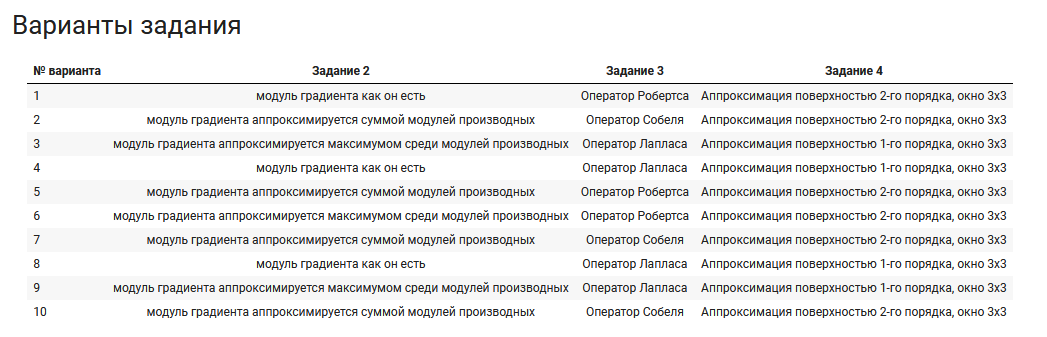

### 1. Считать цветное rgb изображение. Преобразовать в градации серого.

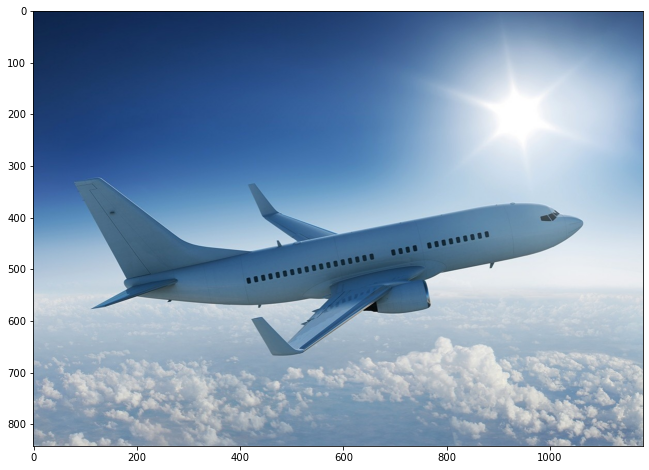

In [2]:
plt.figure(figsize=(14, 8))
img = cv2.imread("tofly.jpeg")[..., ::-1]
plt.imshow(img, vmin=0, vmax=255)

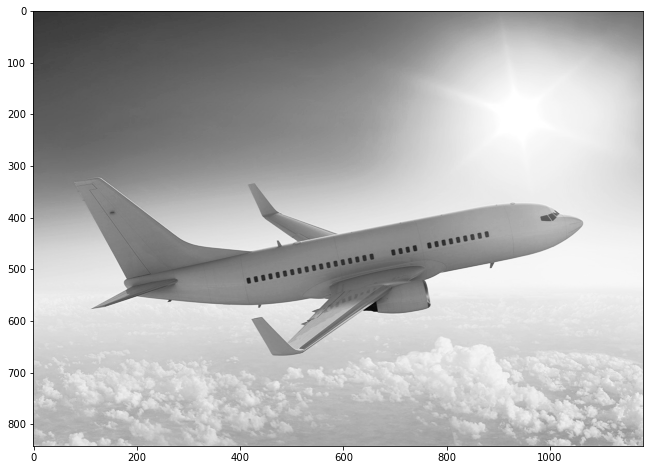

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(14, 8))
plt.imshow(img_gray, vmin=0, vmax=255, cmap='Greys_r')

### 2. Сделать выделение контуров методом простого градиента. В качестве значения модуля градиента использовать указанный в вариантах метод. 

In [4]:
#     Вход: изображение из пункта 1
#     Вывод: бинарное изображение с контурами

In [5]:
grad_x = np.array([[-1, 1]])
grad_y = np.array([[-1], [1]])

In [6]:
def convolution(mt, kernel):
    kernel = np.rot90(kernel, k = 2)
    mt = mt.ravel()
    z = [mt[i:i + len(kernel.ravel())] for i in range(0, len(mt), len(kernel.ravel()))]
    t = z * kernel.ravel()
    return t.sum()

def derivative(img, h):
    image1 = img.copy().astype(int)
    x, y = h.shape
    for a in range(0, image1.shape[0]-x+1):
        for b in range(0, image1.shape[1]-y+1):
            matrx1 = img[a:a + x, b:b + y]
            image1[a,b]=convolution(matrx1,h)
    return image1

def gradient(image, grad_x, grad_y):
    g1 = derivative(image, grad_x)
    g2 = derivative(image, grad_y)
    return np.sqrt(np.square(g1) + np.square(g2)).astype(int)

In [7]:
grad_out = gradient(img_gray, grad_x, grad_y)

In [8]:
def thresholding(image,p):
    change_image = np.where(image <= p, 0, 255)
    return change_image 

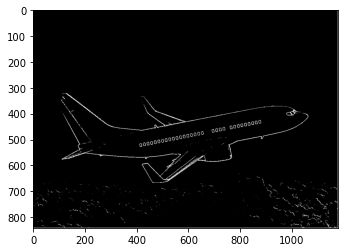

In [9]:
thresh_out = thresholding(grad_out, 25)
plt.imshow(thresh_out, cmap='gray')

### 3. Сделать выделение контуров методом по вариантам. 

In [10]:
#     Вход: изображение из пункта 1
#     Вывод: бинарное изображение с контурами

In [11]:
laplace = np.array([[0,1,0], [1,-4,1], [0,1,0]])

In [12]:
def laplace_operator(image,h):
    l = derivative(image, h)
    return np.abs(l)

In [13]:
lapl_out = laplace_operator(img_gray, laplace)

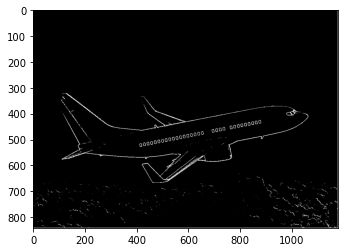

In [14]:
thresh_out = thresholding(grad_out, 25)
plt.imshow(thresh_out, cmap = 'gray')

### 4. Сделать выделение контуров методом с согласованием. Тип функции аппроксимации и размер окна указан по вариантам. 

In [15]:
#     Вход: изображение из пункта 1
#     Вывод: бинарное изображение с контурами

In [16]:
first = 1/6 * np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
second = 1/6 * np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

In [17]:
def matching(image, grad_x, grad_y):
    f = derivative(image, grad_x)
    s = derivative(image, grad_y)
    return np.sqrt(np.square(f) + np.square(s)).astype(int)

In [18]:
out_matching = matching(img_gray, first, second)

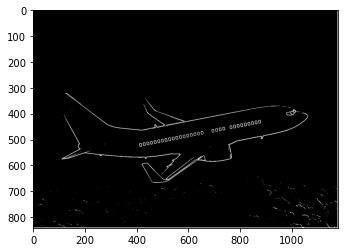

In [19]:
fine = thresholding(out_matching, 20)
plt.imshow(fine, cmap='gray')